<a href="https://colab.research.google.com/github/MdTamimAbdullah/MdTamimAbdullah.github.io/blob/master/Python_Assignment_DA_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files


uploaded = files.upload()

Saving traffic_accidents_c6.csv to traffic_accidents_c6.csv


In [9]:
import pandas as pd
df = pd.read_csv('traffic_accidents_c6.csv')
df.head(10)

,crash_date,lighting_condition,first_crash_type,crash_type,prim_contributory_cause,num_units,most_severe_injury,injuries_total,injuries_fatal,crash_hour
0,07/29/2023 01:00:00 PM,DAYLIGHT,TURNING,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,13
1,08/13/2023 12:11:00 AM,"DARKNESS, LIGHTED ROAD",TURNING,NO INJURY / DRIVE AWAY,IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,0.0,0
2,12/09/2021 10:30:00 AM,DAYLIGHT,REAR END,NO INJURY / DRIVE AWAY,FOLLOWING TOO CLOSELY,3,NO INDICATION OF INJURY,0.0,0.0,10
3,08/09/2023 07:55:00 PM,DAYLIGHT,ANGLE,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,19
4,08/19/2023 02:55:00 PM,DAYLIGHT,REAR END,NO INJURY / DRIVE AWAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,NO INDICATION OF INJURY,0.0,0.0,14
5,09/06/2023 12:59:00 AM,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,1,NONINCAPACITATING INJURY,2.0,0.0,0
6,12/20/2022 11:45:00 AM,DAYLIGHT,REAR TO FRONT,NO INJURY / DRIVE AWAY,IMPROPER BACKING,2,NO INDICATION OF INJURY,0.0,0.0,11
7,09/20/2023 02:38:00 PM,DAYLIGHT,ANGLE,INJURY AND / OR TOW DUE TO CRASH,FAILING TO YIELD RIGHT-OF-WAY,2,NONINCAPACITATING INJURY,1.0,0.0,14
8,06/04/2018 06:42:00 PM,DAYLIGHT,REAR END,NO INJURY / DRIVE AWAY,FOLLOWING TOO CLOSELY,2,NO INDICATION OF INJURY,0.0,0.0,18
9,09/07/2023 05:30:00 PM,DAYLIGHT,ANGLE,NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,2,NO INDICATION OF INJURY,0.0,0.0,17


In [10]:
missing_counts = df.isnull().sum()
print(missing_counts)

crash_date                 0
lighting_condition         0
first_crash_type           0
crash_type                 0
prim_contributory_cause    0
num_units                  0
most_severe_injury         0
injuries_total             0
injuries_fatal             0
crash_hour                 0
dtype: int64


In [11]:
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['crash_month'] = df['crash_date'].dt.month_name()

<ipython-input-11-c9f886a39ae1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


In [13]:
df['crash_day'] = df['crash_date'].dt.day_name()

In [14]:
df[['crash_date','crash_month','crash_day']].head(5)

,crash_date,crash_month,crash_day
0,2023-07-29 13:00:00,July,Saturday
1,2023-08-13 00:11:00,August,Sunday
2,2021-12-09 10:30:00,December,Thursday
3,2023-08-09 19:55:00,August,Wednesday
4,2023-08-19 14:55:00,August,Saturday


In [15]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['lighting_condition', 'first_crash_type', 'crash_type', 'prim_contributory_cause', 'most_severe_injury', 'crash_month', 'crash_day']


In [16]:
cat_cols = ['lighting_condition','first_crash_type','crash_type',
            'prim_contributory_cause','most_severe_injury','crash_month','crash_day']
unique_counts = df[cat_cols].nunique()
print(unique_counts)

lighting_condition          6
first_crash_type           18
crash_type                  2
prim_contributory_cause    40
most_severe_injury          5
crash_month                12
crash_day                   7
dtype: int64


In [17]:
numeric_cols = ['num_units','injuries_total','injuries_fatal','crash_hour']
stats = df[numeric_cols].describe()
print(stats.to_markdown())

|       |     num_units |   injuries_total |   injuries_fatal |   crash_hour |
|:------|--------------:|-----------------:|-----------------:|-------------:|
| count | 209306        |    209306        |  209306          | 209306       |
| mean  |      2.0633   |         0.382717 |       0.00185852 |     13.373   |
| std   |      0.396012 |         0.79972  |       0.0475016  |      5.60383 |
| min   |      1        |         0        |       0          |      0       |
| 25%   |      2        |         0        |       0          |      9       |
| 50%   |      2        |         0        |       0          |     14       |
| 75%   |      2        |         1        |       0          |     17       |
| max   |     11        |        21        |       3          |     23       |


<ipython-input-18-e6d2442d6756>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M', on='crash_date').size()


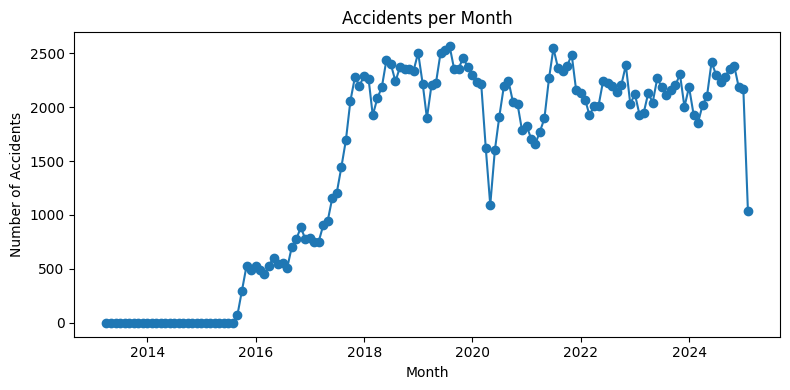

In [18]:
import matplotlib.pyplot as plt

monthly_counts = df.resample('M', on='crash_date').size()
plt.figure(figsize=(8,4))
plt.plot(monthly_counts.index, monthly_counts, marker='o')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

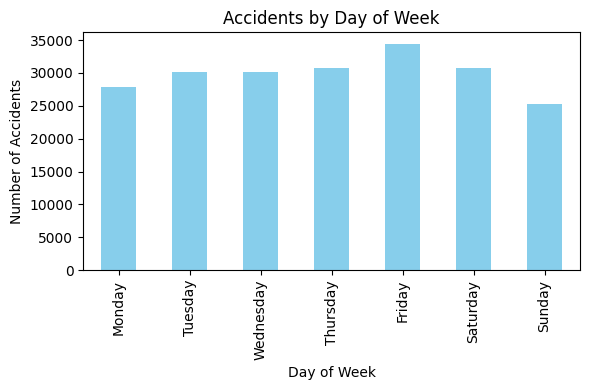

In [19]:
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
acc_by_day = df['crash_day'].value_counts().reindex(day_order)
plt.figure(figsize=(6,4))
acc_by_day.plot(kind='bar', color='skyblue')
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

The most accident-prone hour is 17:00 with 16097 accidents.


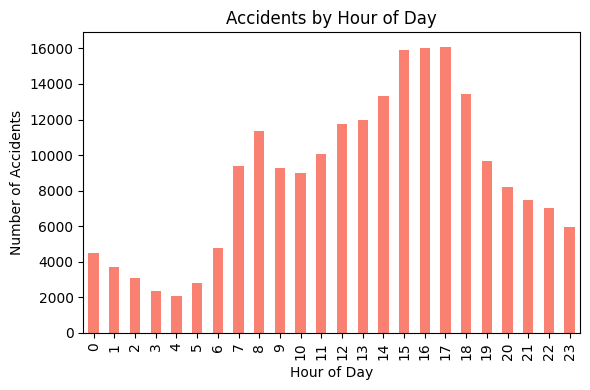

In [21]:

hour_counts = df['crash_hour'].value_counts().sort_index()
most_accident_hour = hour_counts.idxmax()
print(f"The most accident-prone hour is {most_accident_hour}:00 with {hour_counts.max()} accidents.")

plt.figure(figsize=(6,4))
hour_counts.plot(kind='bar', color='salmon')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

<ipython-input-22-26940d92e531>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  day_counts = df_lc[daylight_mask].resample('M', on='crash_date').size()
<ipython-input-22-26940d92e531>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dark_counts = df_lc[~daylight_mask].resample('M', on='crash_date').size()


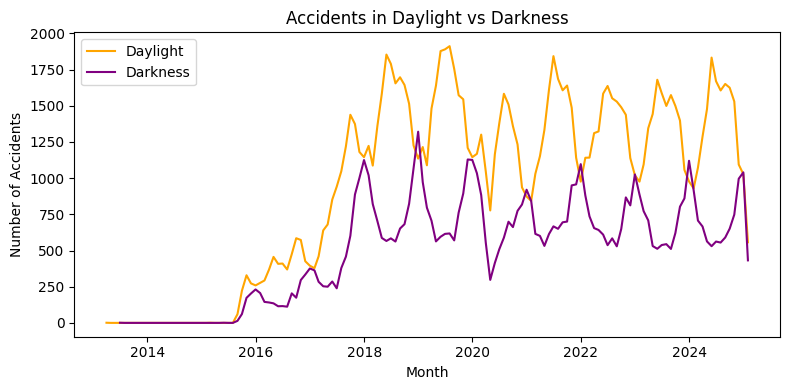

In [22]:
# Exclude unknown lighting conditions
df_lc = df[df['lighting_condition'] != 'UNKNOWN'].copy()
daylight_mask = df_lc['lighting_condition'] == 'DAYLIGHT'
day_counts = df_lc[daylight_mask].resample('M', on='crash_date').size()
dark_counts = df_lc[~daylight_mask].resample('M', on='crash_date').size()

plt.figure(figsize=(8,4))
plt.plot(day_counts.index, day_counts, label='Daylight', color='orange')
plt.plot(dark_counts.index, dark_counts, label='Darkness', color='purple')
plt.title('Accidents in Daylight vs Darkness')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend()
plt.tight_layout()
plt.show()

| first_crash_type         |   count |
|:-------------------------|--------:|
| TURNING                  |   64157 |
| ANGLE                    |   52250 |
| REAR END                 |   42018 |
| SIDESWIPE SAME DIRECTION |   20116 |
| PEDESTRIAN               |    8996 |


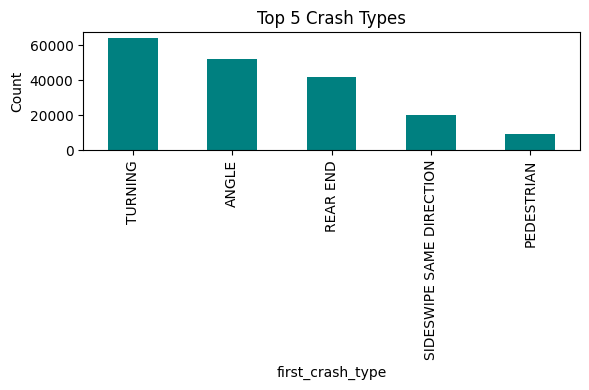

In [23]:
#Top 5 common crush types
top5_types = df['first_crash_type'].value_counts().nlargest(5)
print(top5_types.to_markdown())
# bar chart visualization
plt.figure(figsize=(6,4))
top5_types.plot(kind='bar', color='teal')
plt.title('Top 5 Crash Types')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

| prim_contributory_cause       |   count |
|:------------------------------|--------:|
| UNABLE TO DETERMINE           |   58316 |
| FAILING TO YIELD RIGHT-OF-WAY |   42914 |
| FOLLOWING TOO CLOSELY         |   19084 |
| DISREGARDING TRAFFIC SIGNALS  |   14591 |
| IMPROPER TURNING/NO SIGNAL    |   12643 |


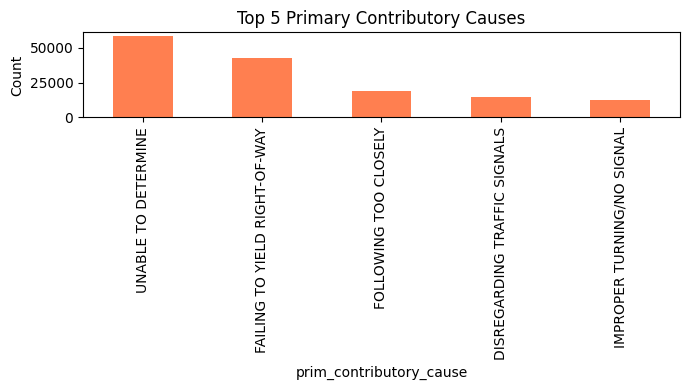

In [24]:
top5_causes = df['prim_contributory_cause'].value_counts().nlargest(5)
print(top5_causes.to_markdown())

plt.figure(figsize=(7,4))
top5_causes.plot(kind='bar', color='coral')
plt.title('Top 5 Primary Contributory Causes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

|   crash_hour |   injuries_fatal |
|-------------:|-----------------:|
|           21 |               29 |
|            1 |               27 |
|           23 |               27 |


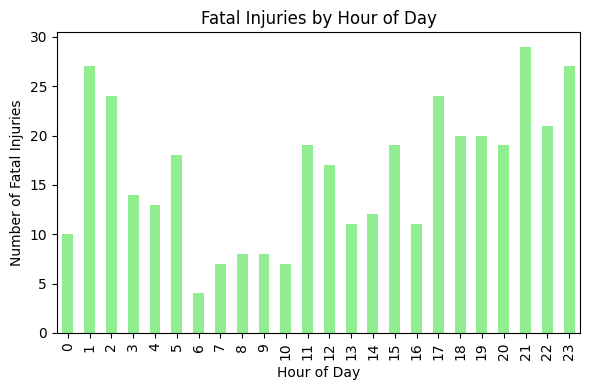

In [25]:
fatal_by_hour = df.groupby('crash_hour')['injuries_fatal'].sum()
top_hours = fatal_by_hour.sort_values(ascending=False).head(3)
print(top_hours.to_markdown())

plt.figure(figsize=(6,4))
fatal_by_hour.plot(kind='bar', color='lightgreen')
plt.title('Fatal Injuries by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fatal Injuries')
plt.tight_layout()
plt.show()

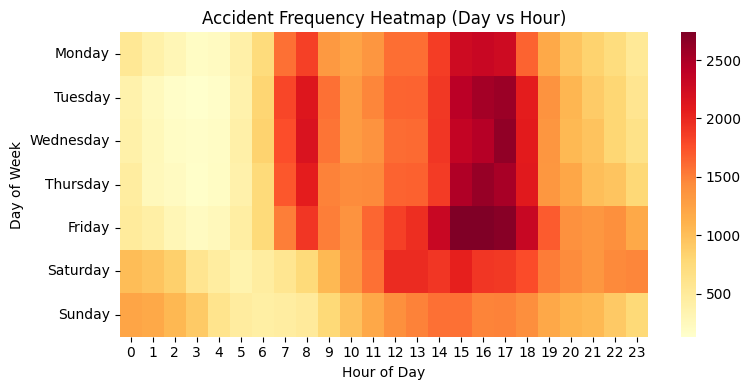

In [26]:
import numpy as np
import seaborn as sns

# Prepare data for heatmap: rows = days, columns = hours
heatmap_data = df.groupby(['crash_day','crash_hour']).size().unstack(fill_value=0)
# Reorder days for typical Monday-Sunday sequence
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(8,4))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Accident Frequency Heatmap (Day vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()